Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "MARTINEZ"
PRENOM = "Maud"
GROUPE = "3"
DATE = "20/03/2019"

---

# TD 7: Ajustement de données

## Introduction

On considère deux séries de données $xdata$ et $ydata$. 
- Représenter graphiquement les points $(xdata_i,ydata_i)$.
- Effectuer une régression linéaire de $ydata$ en fonction de $xdata$: tracer la droite de regression linéaire $y=ax+b$ sur le graphe précédent. 
- Afficher $a$, $b$ ainsi que la valeur du coefficient de détermination $R^2$.

Conclusion: est-ce que les variations de $xdata$ expliquent les variations de $ydata$ ?   

3.0445945945945945 0.009054054054054017 0.9847073818004052


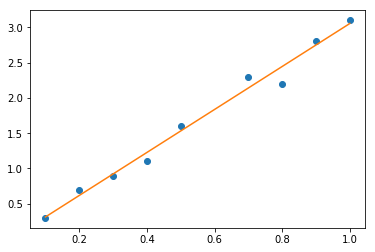

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


xdata = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1])
ydata = np.array([0.3, 0.7, 0.9, 1.1, 1.6, 2.3, 2.2, 2.8, 3.1])

plt.plot(xdata,ydata, 'o')

a, b, r, p, stderr = stats.linregress(xdata, ydata)
plt.plot(xdata, a*xdata + b)
print(a, b, r**2)

## Exercice 1: Régression linéaire

Pour comprendre dans quelles situations un modèle linéaire $y=ax+b$ résume de manière pertinente la relation entre une série de données et une autre, nous allons générer nous-même des jeux de données puis effectuer une régression linéaire dessus. 

Partons d'un tableau $x$ de nombres réels $x_0,x_1,x_2...x_i...x_N$ compris entre 0 et 10 ($N$=100 valeurs par exemple). Nous allons créer un tableau $y$ de réels $y_i =ax_i+b+\epsilon_i$ où $\epsilon_i$ est un nombre aléatoire.    

Ce nombre aléatoire $\epsilon_i$ sera généré à l'aide de la fonction $np.random.normal$ (voir script ci-dessous). 

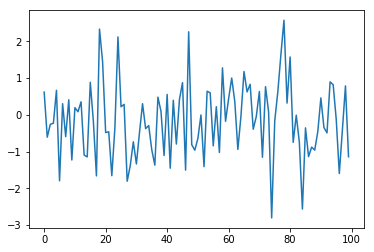

In [5]:
moyenne = 0.0
sigma = 1.0
N=100
epsilon= np.random.normal(moyenne, sigma, N)

plt.figure()
plt.plot(epsilon)
plt.show()

Le programme ci-desous génère des jeux de données $x$ et $y$. 
- Jouer avec la fonction $np.random.normal$ pour en comprendre le fonctionnement: générer N nombres aléatoires avec cette fonction, représenter graphiquement ces nombres, en faire  un histogramme puis faire varier $moyenne$ et $sigma$.   


In [8]:
moyenne = 0.0
sigma = 1.0
N=100
x= np.random.normal(moyenne, sigma, N)
y=np.random.normal(moyenne, sigma, N)


- Effectuer une regression linéaire sur ces données. 
- Comment varie le coefficient $R^2$ lorsque l'amplitude $sigma$ de fluctuation de $y$ augmente ?

0.026762447797510296 -0.05835604335897291 0.0007427927286133032


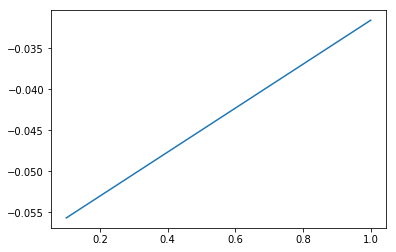

In [10]:
a, b, r, p, stderr = stats.linregress(x,y)

plt.plot(xdata, a*xdata + b)
print(a, b, r**2)

## Exercice 2: Exploitation de mesures expérimentales

Dans cet exercice nous allons reprendre les mesures du TP1 de l'UE Phys102. Si vous disposez de vos propres mesures, essayez les vôtres ! Il s'agit de mesurer l'indice de réfraction de l'altuglas à partir de la mesure des angles incidents et réfractés ci-dessous:

\begin{array}{ccc}  \hline \hline
i [°] 	& r [°] & \delta i [°] & \delta r [°]  \\
\hline
0 & 0 & 0.5 & 1 \\
10 & 6 & 0.5 & 1 \\
15 & 10 & 1 & 1 \\
20 & 12 & 1 & 1 \\
25 & 15 & 1 & 1 \\
30 & 19 & 1 & 1.5 \\
35 & 22 & 1 & 1.5 \\
40 & 23 & 1 & 1.5 \\
45 & 28 & 1 & 1.5 \\
50 & 30 & 1 & 1.5 \\
55 & 33 & 1 & 2 \\
60 & 34 & 1 & 2 \\
\hline \hline
\end{array}

Le premier milieu est l'air ambiant, le second l'altuglas. On suppose que l'évolution de l'angle de réfraction $r$ avec l'angle d'incidence $i$ suit la loi de Descartes: 

$$ n \sin(r) = \sin(i) $$.
avec $n$ l'indice de réfraction inconnu de l'altuglas.

- Ecrire une fonction `loi_refraction(i, n)`qui retourne la valeur de $r$ en degrée à partir de l'indice `n` de l'altuglas et `i` l'angle d'incidence en degrée également.

In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

#Jeu de données simulées
i_data = np.array([0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
r_data = np.array([0, 6, 10, 12, 15, 19, 22, 23, 28, 30, 33, 34])
di_data = np.array([0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
dr_data = np.array([1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 2, 2])
n0=1
def loi_refraction(i, n):
    return np.arcsin(np.sin(np.radians(i))/n)



- Ajuster la loi de Descartes aux données expérimentales à l'aide de [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) , et représenter sur un même graphique les données, leurs incertitudes et le modèle ajusté.
- Que vaut l'indice de l'atluglas et quel est son incertitude ? Qu'en déduisez-vous si on suppose qu'en réalité $n_{\text{altuglas}}=1.57$ ?

[1.55456521]


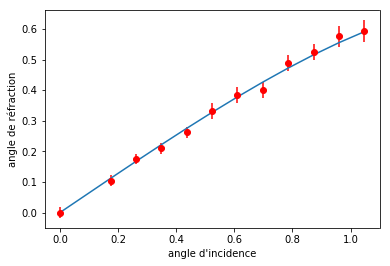

In [21]:
params, cov=opt.curve_fit(loi_refraction,i_data, np.radians(r_data), n0, np.radians(dr_data))

a = params


plt.figure()
plt.errorbar(np.radians(i_data), np.radians(r_data), np.radians(dr_data), marker='o', color='r', linestyle ='None')
plt.plot(np.radians(i_data), loi_refraction(i_data, a))
plt.xlabel("angle d'incidence")
plt.ylabel("angle de réfraction")
print(a)

- Calculer les résidus normalisés aux incertitudes, et les représenter sous forme d'un graphique en fonction de $i$ et sous forme d'histogramme.
- Que vaut le $\chi^2$ réduit ? Est-il bon ou mauvais ?

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()


Maintenant imagninons que Descartes ne soit jamais né, et que nous soyons toujours ignorant de la véritable loi de la réfraction. On souhaite toutefois décrire nos données, et pour cela, vue la courbe expérimentale, on peut penser à une fonction polynomiale, de degré 2 probablement. 
- Remplacer les ... dans la fonction ci-dessous. Utiliser la fonction [`np.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) pour ajuster un polynome de degré $k$ aux données, calculer les résidus et le $\chi^2$ réduit. Attention la convention pour les poids dans `np.polyfit` est $w_i = 1/\sigma_i$, et on donnera comme argument `cov='unscaled'`.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- Ecrire une boucle qui utlise la fonction `ajustement_polynome` et fait varier le degré du polynôme ajusté. 

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- Qu'en déduisez-vous ? Un modèle polynomial est-il adapté et si oui lequel ? Vaut-il mieux un degré plus élevé, un degré plus faible, intermédiare ?

LA REPONSE ICI (double-clique pour éditer la cellule)

## Exercice 3: Spectre solaire 

Le fichier `data/solar_spectrum.csv` contient des données permettant de reconstituer le spectre de la lumière émise par le soleil. La première colonne est la longueur d'onde $\lambda$ en nm, la seconde est l'irradiance spectrale en $W.m^{-2}.nm^{-1}$ correspondant à cette longueur d'onde.


On donne le spectre du corps noir:

$$ E(\lambda)=\frac{A}{\lambda^5} \frac{1}{e^{hc/(\lambda k_B T)}-1} (W.m^{-2}.nm^{-1})$$ 

- $E(\lambda)$ est l'irradiance spectrale du corps noir
- $\lambda$ est la longueur d'onde de la lumière
- $A$ est une constante
- $h$ est la constante de Planck
- $k_B$ la constante de Boltzmann
- $c$ la vitesse de la lumière
- $T$ la température du corps noir. 

Peut-on modéliser le spectre du Soleil par un spectre de corps noir, et si oui, quelle est la température $T$ de ce corps noir ?   
- Charger le fichier de données avec `np.loadtxt`.
- Placer les colonnes donnant les longueurs d'ondes et l'irradiance dans deux arrays.
- Créer une fonction `planck_lambda(lbd, A, T)` représentant un spectre de corps noir en fonction de `lbd` la longueur d'onde, `A` l'amplitude et `T` la température. On trouvera la valeur des constantes fondamentales sur Internet.
- Ajuster les données expérimentales avec cette fonction à l'aide de `curve_fit`.
- Que vaut la température du Soleil ?
- Représenter les données et la fonction ajustée sur un même graphique.


Remarque: si la fonction d'ajustement des données par le modèle de corps noir ne converge pas, ou donne des résultats très éloignés des données expérimentales, ne pas hésiter à "aider" l'algorithme en règlant les paramètres initiaux. Par exemple, un ordre de grandeur de $A/\lambda^5$ est la valeur approchée du maximum de la courbe expérimentale. De même, vous pouvez donner comme valeur initiale de $T$ un ordre de grandeur de la température du soleil... 

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


#LA REPONSE ICI
raise NotImplementedError()